<a href="https://colab.research.google.com/github/bitprj/DigitalHistory/blob/Shayan/Week7-Visualizations-and-Exploratory-Analysis-using-Seaborn-and-Pandas/homework/Week7-Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <div align="center">Week 13 - Homework 5</div>

# <div align="center">Analyzing the Recent Graduates Dataset</div>

Welcome to Week 13! The goal of this homework is to use visualizations to explore questions from the dataset. Some of the questions we will explore include:
- Is there a correlation between higher unemployment rates, median and the gender majority in a major. (Box plots)
- Do students in more popular majors make more money? (Use scatterplots)
- How many majors are predominantly male? Predominantly female? (Use histograms)

While we can use the pandas interface with matplotlib for plotting data that is stored in Series and DataFrame objects, we will focus instead on using seaborn, which is a high-level library for making statistical graphics in Python that is built upon matplotlib and closely integrated with pandas.

|  Questions                                      |Count|     
|-------------------------------------------------|-----|
|<div align="left">Mystery Question</div>        | 1   |
|<div align="left">Box plots</div>                | 2   |
|<div align="left">Distribution graphs</div>      | 3   |
|<div align="left">Scatter graphs</div>           | 4   |


## About the Dataset
The original data was collected and aggregated by the American Community Survey, though the set we will be using is the cleaned version from FiveThirtyEight. Each row represents a different college major and contains information on things such as gender diversity, employment rates, median salaries, and more. The columns in the dataset are as follows.

| <div align="center">Columns</div>                 | <div align="left">Description</div> |
|---------------------|--------------------------------------------------------------------------|
|<div align="center">Rank</div>                 | <div align="left">Rank by median earnings. Note that the dataset is ordered by this column</div> |
|<div align = "center">Major_code</div>           | <div align="left">Major code.|
|<div align = "center">Major</div>                | <div align="left">Major description.|
|<div align = "center">Major_category</div>       | <div align="left">Category of major                 |
|<div align = "center">Total</div>                | <div align="left">Total number of people with major.|
|<div align = "center">Sample_size</div>          | <div align="left">Sample size (unweighted) of full-time, year-round workers only, who reported earnings of at least $1. This sample is used for computing the earnings columns Median, P25th, and P75th for each major.|
|<div align="center">Men</div>                  | <div align="left">Number of male graduates.|
|<div align="center">Women</div>                | <div align="left">Number of female graduates.|
|<div align="center">ShareWomen</div>           | <div align="left">Proportion of women as share of total.|
|<div align="center">Employed</div>             | <div align="left">Number employed in civilian jobs.|
|<div align="center">Full_time</div>            | <div align="left">Number employed who work 35 hours or more per week.|
|<div align="center">Part_time</div>            | <div align="left">Number employed who work less than 35 hours per week|
|<div align="center">Full_time_year_round</div> | <div align="left">Number employed at least 50 weeks of the year and work at least 35 hours per week.|
|<div align = "center">Unemployed</div>        | <div align="left">Number unemployed (not employed or in the armed forces and actively looking for work)|
|<div align = "center">Unemployment_rate</div> | <div align="left">(Number Unemployed) / (Number Unemployed + Number Employed).|
|<div align = "center">Median</div>            | <div align="left">Median earnings of full-time, year-round workers, in USD.|
|<div align = "center">P25th</div>             | <div align="left">25th percentile of earnings of full-time, year-round workers, in USD.|
|<div align = "center">P75th</div>             | <div align="left">75th percentile of earnings of full-time, year-round workers, in USD.|
|<div align="center">College_jobs</div>      | <div align="left">Number with job requiring a college degree.|
|<div align="center">Non_college_jobs</div>  | <div align="left">Number with job not requiring a college degree.|
|<div align="center">Low_wage_jobs</div>     | <div align="left">Number in low-wage service jobs.|



# Grading

This exercise has a total of 10 questions. Every question has 1 point. Some questions might have multiple parts but the weight of the question is the same.

In order to work on the questions in this Practicum and submit them for grading, you'll need to run the code block below. It will ask for your student ID number and then create a folder that will house your answers for each question. At the very end of the notebook, there is a code section that will download this folder as a zip file to your computer. This zip file will be your final submission.

In [ ]:
import os
import shutil

!rm -rf sample_data

student_id = input('Please Enter your Student ID: ') # Enter Student ID.

while len(student_id) != 9:
 student_id = int('Please Enter your Student ID: ')  
  
folder_location = f'{student_id}/Week_13/Homework'
if not os.path.exists(folder_location):
  os.makedirs(folder_location)
  print('Successfully Created Directory, Lets get started')
else:
  print('Directory Already Exists')

## Load the Libraries and Dataset

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
recent_grads = pd.read_csv('https://raw.githubusercontent.com/bitprj/DigitalHistory/master/Week7-Visualizations-and-Exploratory-Analysis-using-Seaborn-and-Pandas/data/recent-grads.csv')

In [3]:
recent_grads.head()


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [4]:
recent_grads.tail()


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,5043,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,1848,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,1724,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,3154,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,593,237,410,87,0.104946,22000,20000,22000,288,338,192


In [5]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [6]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

### Importance of Sample Size

The Sample size can be a very important distinguishing factor in order results. What it highlights is the number of people who were actually interviewed for that specific major. In this case, the sample size does not have even distribution and varies for each major.

## New methods introduced in this Homework

#### New Way to declare subplots

Previously, if we were to make subplots we would follow the method:
```
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

```
And in order to present a seaborn or pandas in a subplot, we would add
```ax = ax1``` as a parameter in the  ```sns.plot()``` or ```df.plot()```

Now, we're are going to use something that involves less code and is a fairly easy implementation

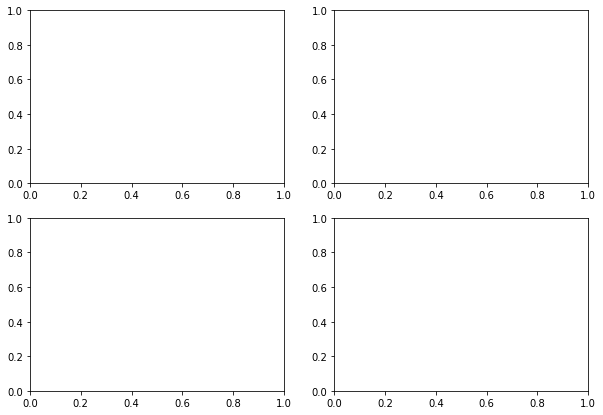

In [7]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 7))

We run the code ```plt.subplots``` and declare parameters inside ```nrows``` and ```ncols``` set to ```2```. We also declared ```figsize``` to ```(10,7)``` (inches).

The code above returns two objects that we store as variables: 
- The first is the whole figure which we store as ```fig```. 
- The second one is every subplot stored as one variable ```axes```. 

This might sound confusing but basically bove we declared a 2 x 2 matrix of subplots. Therefore, through ```axes```, all four subplot plots inside ```fig``` are a specific position in a matrix.


If we want to place a plot inside one of those subplots, we simply use the following method:

In the example below, I have used the pandas ```df.plot()``` method to print ```Total``` vs ```Part_time```. Focus on the last parameter declared. ```ax``` = ```axes[1,1]```, means that we are telling it to place the scatter plot on the cell in the 2nd row and 2nd column. (Note: when we declare nrows = 2 and ncols = 2, python is creating a matrix starting from 0, which is a digit in programming). The matrix essentially is like this:

|  |0    | 1   |
|--|-----|-----|
|0 |[0,0]|[0,1]|
|1 |[1,0]|[1,1]|

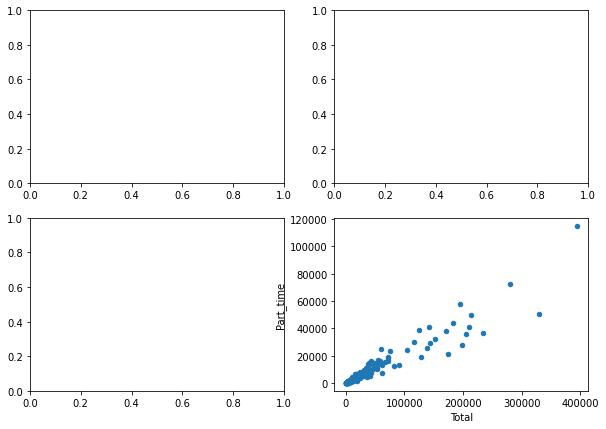

In [8]:
recent_grads.plot(x = 'Total',y = 'Part_time',kind = 'scatter',ax = axes[1,1])
fig

### Using ```axhline``` and ```axvline```

The first two blocks of are already familiar to you now, lets look into the third and fourth.

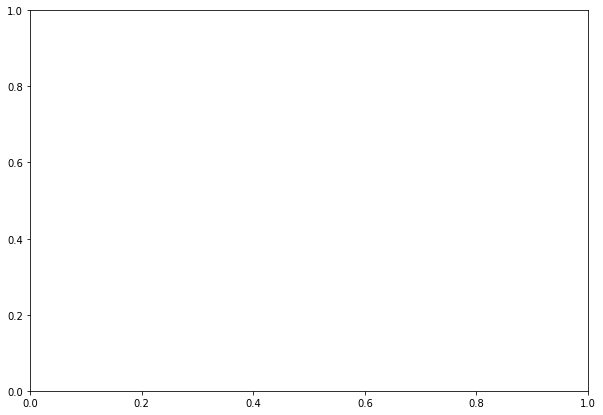

In [12]:
fig, ax = plt.subplots(figsize = (10, 7))

In [13]:
sns.scatterplot(x = "Sample_size",
                y = "Unemployment_rate",
                data = recent_grads,
                ax= ax)

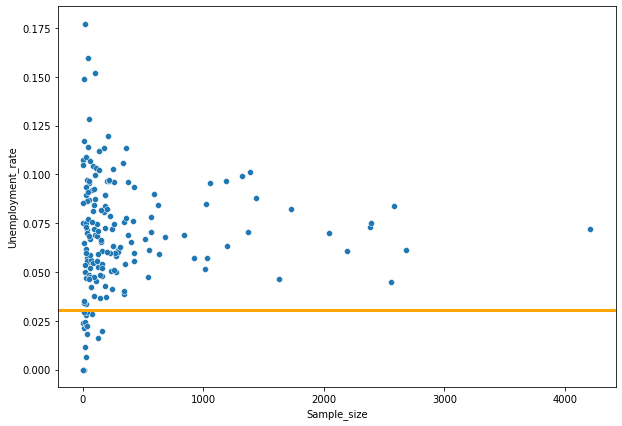

In [14]:
ax.axhline(y = recent_grads["Unemployment_rate"].std(),
           color = "orange",
           linestyle = "-",
           linewidth = 3,
          label = "Standard Deviation Sample Size")
fig

Over here we have introduced a new method called ```axhline```.
This function adds a horizontal line across the axis.

Note: We have attached the object to ```ax``` because we want to print it on the same graph.

The paramters declared inside are:
- ```y``` 
- ```color``` 
- ```linestyle```
- ``` linewidth```
- ```label```

While you may be familiar with the latter 4, we have added a property to our dataframe column in the ```y``` parameter. In the case above we have added ```std()``` to the column ```recent_grads["Unemployment_rate"]```. This is doable because the column itself is an object and we are finding is the standard deviation. Similarly, we can plot properties such as ```mean()```, ```median()``` etc. In short we can use this method to plot the properties shown through ```df.describe()```


You might also be wondering why we have used `sns.scatterplot(...)` instead of `sns.relplot(kind='scatter'...)`. Both of the same thing but the main advantage of using this method is that it allows us to add axes and subplots to our graph. We wouldn't be able to use `axhline` without this method.

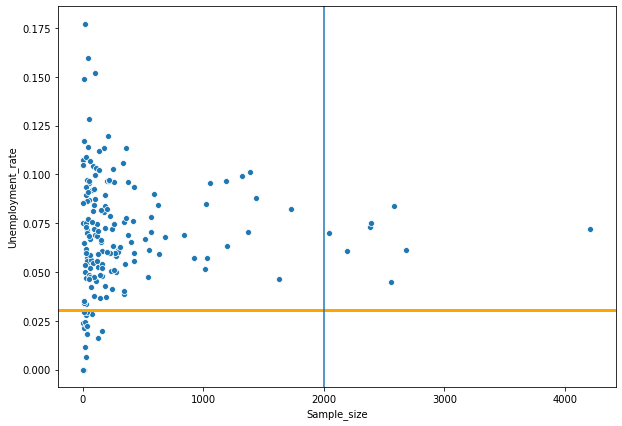

In [ ]:
ax.axvline(x = 2000, linestyle = "-")
fig

The second method we have added to our plot is the ```axvline``` method. This simply plots a vertical line to the position we have declared on the graph. For example, in the case above, we have declared the ```x``` value as 2000.

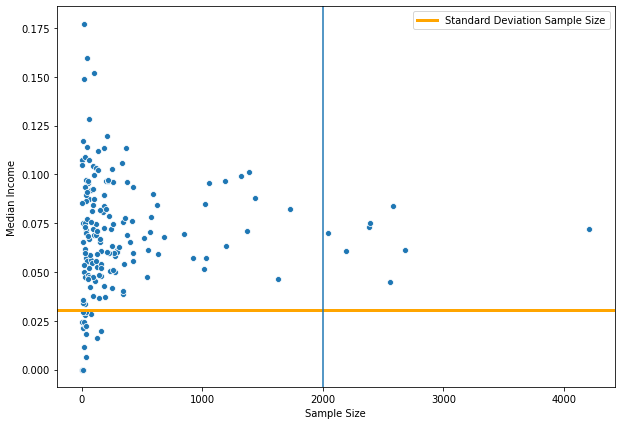

In [ ]:
ax.legend(loc = "best")

ax.set(xlabel = "Sample Size",
       ylabel = "Median Income");
fig

## Q1. Mystery Question



In order to get one of your graphs to be displayed without error, you will have to perform a step which involves cleaning your dataset. We've done this procedure before as it involves dropping `null` values.


In [ ]:
#Once your have verified your answer please uncomment the line below and run it, this will save your code 
#%%writefile -a {folder_location}/1.py
#Please note that if you uncomment and run multiple times, the program will keep appending to the file.


# INSERT CODE HERE


## Box Plots

For this section, you will be drawing 2 box plots. using a category we made in the tutorial for Week 7, 'Gender Majority'.

In [15]:
def majorityWomen(x):
    if x > .50:
        return 'Majority Women'
    else:
        return 'Majority Men'

recent_grads['Gender Majority'] = recent_grads['ShareWomen'].apply(majorityWomen)

**Note**: For the following plots You can use `sns.boxplot(...)` which is the same as `sns.catplot(kind='box'...)`. The major difference is that the first one lets us use subplots and add axes.

### Q2. Gender Majority vs Median

In [ ]:
#Once your have verified your answer please uncomment the line below and run it, this will save your code 
#%%writefile -a {folder_location}/2.py
#Please note that if you uncomment and run multiple times, the program will keep appending to the file.


fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 8))
sns.#INSERT CODE HERE
        #INSERT CODE HERE 
        #INSERT CODE HERE
        ax = ax[0])

### Q3. Gender Majority vs Unemployment Rate

In [ ]:
#Once your have verified your answer please uncomment the line below and run it, this will save your code 
#%%writefile -a {folder_location}/3.py
#Please note that if you uncomment and run multiple times, the program will keep appending to the file.


sns.# INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        ax = ax[1]
        )

In [ ]:
fig

#### Output

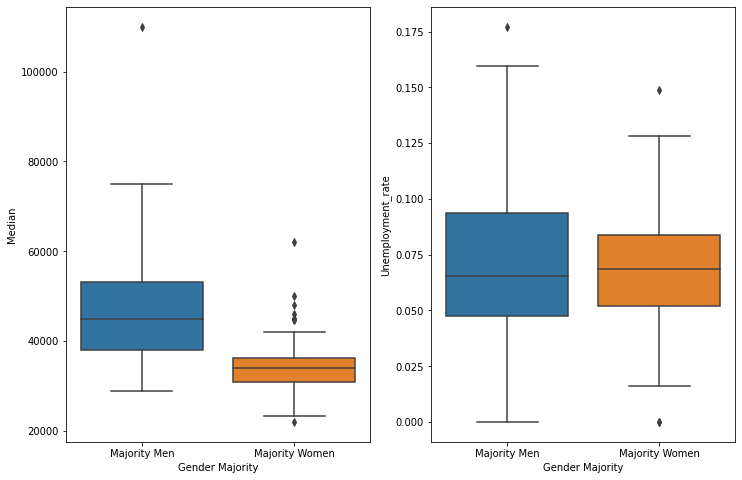

## Distribution Plots


### Q4. Plotting the labor force count

For the following parts you will:
- Using the ```subplot``` method above, create a ```2``` by ```2``` matrix with a ```figsize``` of ```(14,10)```
- Plot distributions plots for ```Total```, ```Share_women```,```Men```,```Women``` as subplots.
- Declare a parameter ```kde``` and set it to ```False``` (*This is because we are only plotting histograms*)


In [ ]:
#Once your have verified your answer please uncomment the line below and run it, this will save your code 
#%%writefile -a {folder_location}/4.py
#Please note that if you uncomment and run multiple times, the program will keep appending to the file.



fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (14, 10)) # INSERT CODE HERE

# Total
sns.# INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        )

# ShareWomen
# INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        

# Men
# INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        )

# Women
# INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        )

#### Output

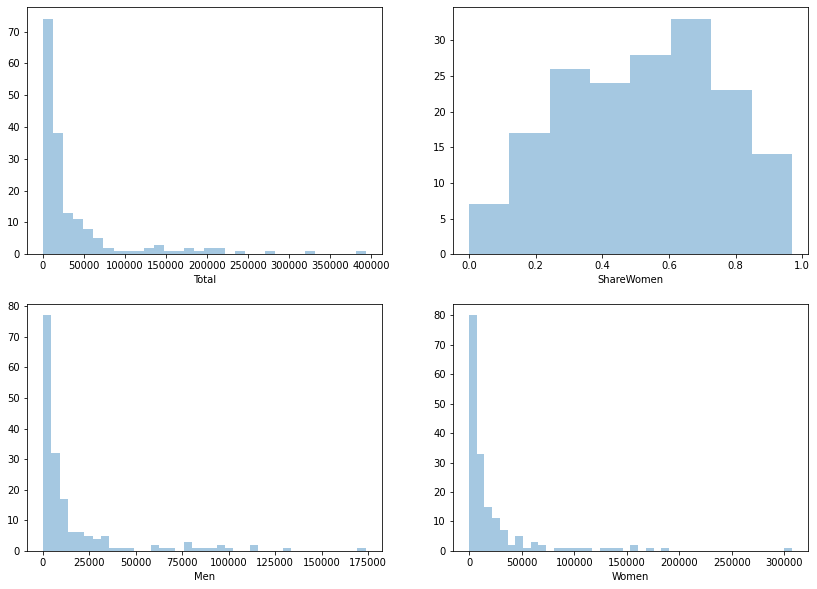

### Q5. Plotting the active and inactive labor force

For this part repeat the steps in the previous question however, plot new columns, ```Median```, ```Unemployment_rate```, ```Employed```, ```Full_time```.

In [ ]:
#Once your have verified your answer please uncomment the line below and run it, this will save your code 
#%%writefile -a {folder_location}/5.py
#Please note that if you uncomment and run multiple times, the program will keep appending to the file.



fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (14, 10))

# Median
# INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        )

# Unemployment_rate
# INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        )

# Employed
# INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        )

# Full_time
# INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        )

#### Output 

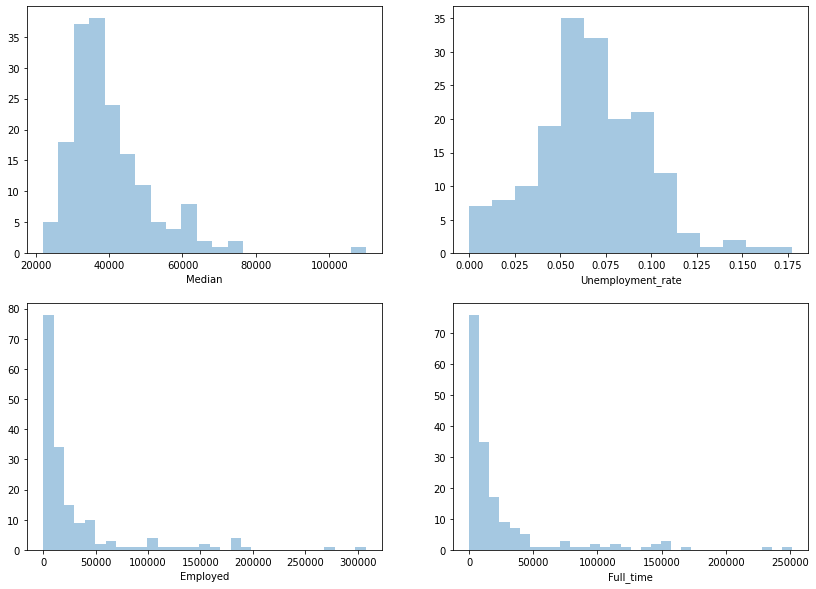

### Q6. Analysis for fewer than 50,000 Graduates

For this question, plot the labor force statistics, with respect to major, where the ```Total``` number of graduates is *less* than ```50000``` are only plotted. 

There are multiple ways to approach this question. You can create a new dataframe for ```Total``` < ```5000```. 

Another way to approach this question is by taking advantage of the ```df.loc``` method.
 We also want to view the kernel density (kde) plots in these ```distplots```.


In [ ]:
#Once your have verified your answer please uncomment the line below and run it, this will save your code 
#%%writefile -a {folder_location}/6.py
#Please note that if you uncomment and run multiple times, the program will keep appending to the file.


fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (14, 10))


sns.distplot(# INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        )


sns.distplot(# INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        )


sns.distplot(# INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        )


sns.distplot(# INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        )

#### Output


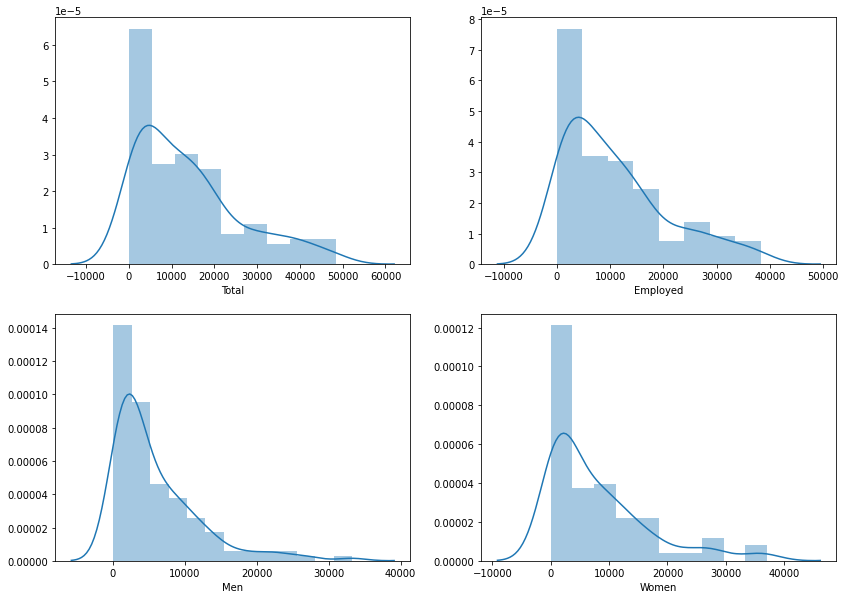

## Scatter plots

### Q7. Visualizing the Un-employment 

In this question you will:
- Plot the ```sample size``` vs the ```unemployment rate```.
- Add ```Median``` as a third parameter
- On the same graph add a line showing the ```median``` ```unemployment rate```. You should also set a ```color```, ```linestyle```, ```linewidth``` and ```label```

In [ ]:
#Once your have verified your answer please uncomment the line below and run it, this will save your code 
#%%writefile -a {folder_location}/7.py
#Please note that if you uncomment and run multiple times, the program will keep appending to the file.


fig, ax = plt.subplots(figsize = (10, 8))


sns.scatterplot(# INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        )


ax.axhline(# INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        )



#### Output

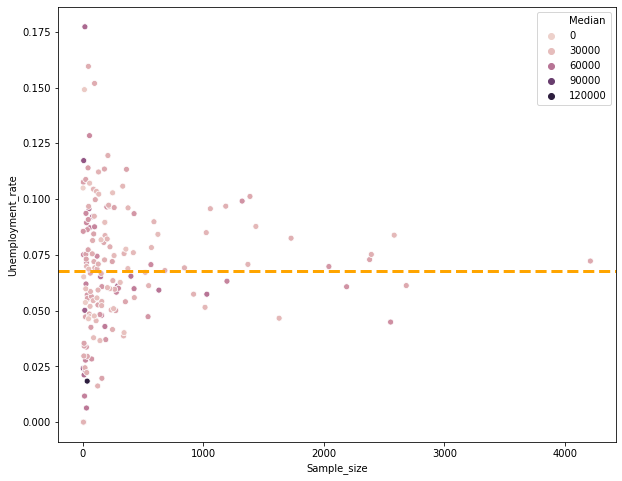

### Q8. Share of Women vs Unemployment

In this question:
- Plot the Share of Women vs Unemployment rate.
- Add Gender Majority as the third parameter.
- Additionally, add ```axhline``` with respect to the mean of the unemployment. Use ```:``` as the ```linestyle```.


**Note**: You will also have to add a legend.

In [ ]:
#Once your have verified your answer please uncomment the line below and run it, this will save your code 
#%%writefile -a {folder_location}/8.py
#Please note that if you uncomment and run multiple times, the program will keep appending to the file.


fig,ax = plt.subplots(figsize = (10, 8))

sns.scatterplot(# INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        )

ax.axhline(# INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        )

ax.legend(# INSERT CODE HERE


#### Output

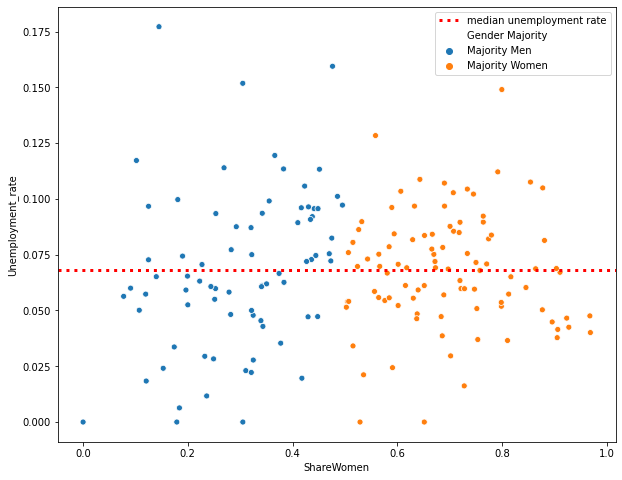

### Q9. Share of Women vs Median Size

In this question:
- Plot the share of women vs median.
- Add the sample size as the third parameter.
- Additionally, add ```axhline``` with respect to the mean of the unemployment. Use ```:``` as the ```linestyle```.
- Add ```axvline``` and set it to the center of the x-axis. Use ```:``` as the ```linestyle```.


**Note**: You will also have to add a legend.

In [ ]:
#Once your have verified your answer please uncomment the line below and run it, this will save your code 
#%%writefile -a {folder_location}/9.py
#Please note that if you uncomment and run multiple times, the program will keep appending to the file.


fig, ax = plt.subplots(figsize = (10, 8))


sns.scatterplot(# INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        )


ax.axhline(# INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        )

ax.axvline(# INSERT CODE HERE
        # INSERT CODE HERE
        )

ax.legend(# INSERT CODE HERE



#### Output

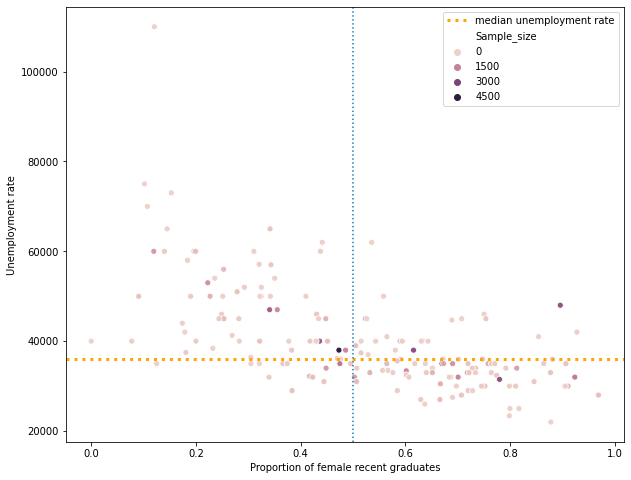

### Q10. Share of Women vs Full time (year round)

In this question:
- Plot the share of women vs fulltime year-round.
- Add Major category as the third parameter and ```Women``` as the 4th parameter

In [ ]:
#Once your have verified your answer please uncomment the line below and run it, this will save your code 
#%%writefile -a {folder_location}/10.py
#Please note that if you uncomment and run multiple times, the program will keep appending to the file.


fig = plt.figure(figsize = (15,10))

sns.scatterplot(# INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        # INSERT CODE HERE
        )

ax.set_title(# INSERT CODE HERE

ax.set_ylim(0, 120000)
ax.set_xlim(0, 1.0)


#### Output

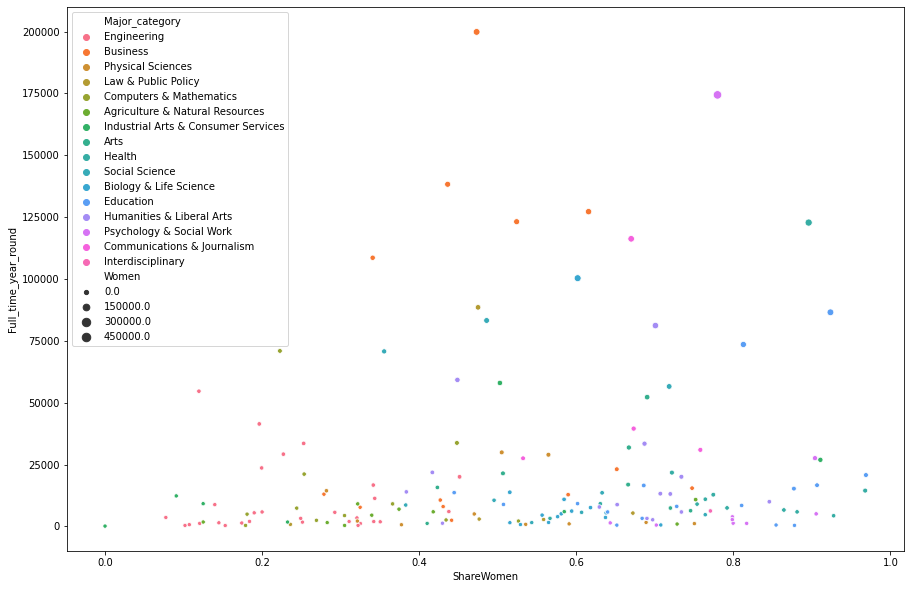


## Submission
Run this code block to download your answers.

In [ ]:
from google.colab import files
!zip -r "{student_id}.zip" "{student_id}"
files.download(f"{student_id}.zip")